#Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow > 2.0

In [ ]:
import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key =" 5ca71302c7b373471f2a9434807735f829b79a06")

<ipython-input-6-34a987afb217>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key =" 5ca71302c7b373471f2a9434807735f829b79a06")


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-31 00:00:00+00:00,227.63,228.87,226.00,226.51,43340134,54.498229,54.795104,54.107981,54.230083,173360536,0.0,1.0
1,AAPL,2018-09-04 00:00:00+00:00,228.36,229.18,226.63,228.41,27390132,54.673002,54.869323,54.258813,54.684973,109560528,0.0,1.0
2,AAPL,2018-09-05 00:00:00+00:00,226.87,229.67,225.10,228.99,33332960,54.316273,54.986637,53.892507,54.823834,133331840,0.0,1.0
3,AAPL,2018-09-06 00:00:00+00:00,223.10,227.35,221.30,226.23,34289976,53.413675,54.431192,52.982726,54.163047,137159904,0.0,1.0
4,AAPL,2018-09-07 00:00:00+00:00,221.30,225.37,220.71,221.85,37619810,52.982726,53.957149,52.841471,53.114405,150479240,0.0,1.0


In [ ]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,AAPL,2023-08-23 00:00:00+00:00,181.12,181.550,178.325,178.520,52722752,181.12,181.550,178.325,178.520,52722752,0.0,1.0
1252,AAPL,2023-08-24 00:00:00+00:00,176.38,181.104,176.010,180.674,54945798,176.38,181.104,176.010,180.674,54945798,0.0,1.0
1253,AAPL,2023-08-25 00:00:00+00:00,178.61,179.150,175.820,177.380,51449594,178.61,179.150,175.820,177.380,51449594,0.0,1.0
1254,AAPL,2023-08-28 00:00:00+00:00,180.19,180.590,178.545,180.090,43820697,180.19,180.590,178.545,180.090,43820697,0.0,1.0
1255,AAPL,2023-08-29 00:00:00+00:00,184.12,184.900,179.500,179.695,53003948,184.12,184.900,179.500,179.695,53003948,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1.shape

(1256,)

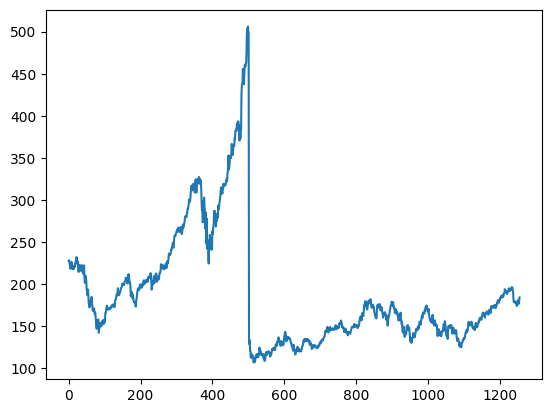

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data . so we apply MinMax scaler

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.30254227]
 [0.3043707 ]
 [0.3006387 ]
 ...
 [0.17976205]
 [0.18371947]
 [0.19356293]]


In [ ]:
##splitting the dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
# convert an array of valyes into a dataset matrix
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY
                                      )


In [ ]:
time_step = 100
X_train , y_train =  create_dataset(train_data, time_step)
X_test , y_test =  create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape) , print(y_train.shape)
print(X_test.shape) , print(y_test.shape)


(715, 100)
(715,)
(339, 100)
(339,)


(None, None)

In [ ]:
#reshape input to be [smaple , time steps , features] which is require for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test= X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [ ]:
### create the Stocked LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape= (100,1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 364ms/step - loss: 0.0521 - val_loss: 0.0016
Epoch 2/100
12/12 [==============================] - 3s 248ms/step - loss: 0.0238 - val_loss: 0.0027
Epoch 3/100
12/12 [==============================] - 4s 337ms/step - loss: 0.0136 - val_loss: 5.3159e-04
Epoch 4/100
12/12 [==============================] - 4s 296ms/step - loss: 0.0108 - val_loss: 6.6697e-04
Epoch 5/100
12/12 [==============================] - 4s 333ms/step - loss: 0.0092 - val_loss: 3.7087e-04
Epoch 6/100
12/12 [==============================] - 2s 203ms/step - loss: 0.0089 - val_loss: 3.3957e-04
Epoch 7/100
12/12 [==============================] - 2s 204ms/step - loss: 0.0077 - val_loss: 0.0011
Epoch 8/100
12/12 [==============================] - 2s 206ms/step - loss: 0.0072 - val_loss: 3.2413e-04
Epoch 9/100
12/12 [==============================] - 2s 200ms/step - loss: 0.0066 - val_loss: 2.8866e-04
Epoch 10/100
12/12 [==============================] - 3s 297ms/ste

In [ ]:
### Lets Do the prediction and check performance metrices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 41ms/step


In [ ]:
### Transformback to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
### Calculate RSME performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

219.7952465914611

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

155.53730299846177

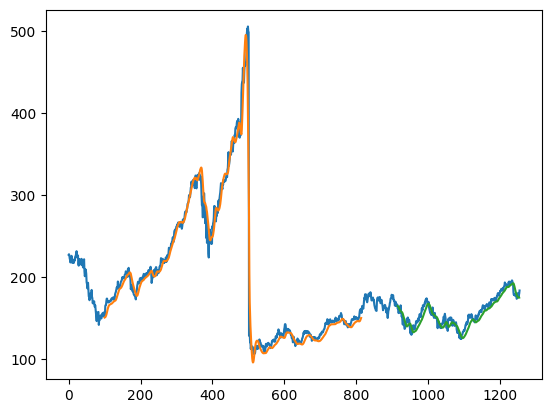

In [ ]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

# Shift test prediction for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
x_input = test_data[340:].reshape(1, -1)
x_input.shape

(1, 100)

In [ ]:
test_data.shape

(440, 1)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist(

)

In [ ]:
temp_input

[0.13823418910457103,
 0.13515341264871633,
 0.1334001252348152,
 0.14707576706324355,
 0.14619912335629304,
 0.14624921728240442,
 0.14935504070131495,
 0.15226048841577955,
 0.14980588603631806,
 0.14572323105823415,
 0.14649968691296178,
 0.14259236067626796,
 0.14256731371321218,
 0.15421415153412643,
 0.15739511584220411,
 0.15716969317470253,
 0.1545397620538509,
 0.15180964308077638,
 0.1476518472135253,
 0.16713838447088286,
 0.16696305572949277,
 0.16262993112085156,
 0.16710081402629928,
 0.16758922980588598,
 0.16463368816530988,
 0.1633813400125234,
 0.1633813400125234,
 0.16493425172197868,
 0.17084533500313087,
 0.17112085159674384,
 0.1687163431433938,
 0.16210394489668123,
 0.16280525986224165,
 0.1656856606136506,
 0.17179711959924854,
 0.17648090169067,
 0.17635566687539134,
 0.1834690043832185,
 0.1856230432060112,
 0.18219160926737632,
 0.18126487163431432,
 0.1777833437695679,
 0.18467125860989347,
 0.18564809016906697,
 0.19273638071383836,
 0.1915341264871634,
 0

In [ ]:
#demonstrate prediction for next 10 days from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
  if(len(temp_input)>100):
    #print(temp_input)
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))
    #print(x_input)
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    #print(temp_input)
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist()) i=i+1

print(1st_output)

SyntaxError: ignored